# INFO-F-422 -  Statistical Foundations of Machine Learning 

### Student 1 - [Melba.Raj.Sathyaraj.Mahila@vub.be](mailto:student1@ulb.ac.be) - Student ID 0574202
### Student 2 - [Deepika.Chandrababu@vub.be](mailto:student2@ulb.ac.be) - Student ID 0572230
### Student 3 - [Nicolas.J.Boucher@ulb.be](mailto:student3@ulb.ac.be) - Student ID 000467388

### Video presentation: www.youtube.com/abcd1234

## Project Title


# Introduction


In [2]:
library(ISwR)
# install.packages('naniar')
library(naniar)
# install.packages('dplyr')
library(dplyr)

library(readr)
library(caret)
library(mltools)
library(data.table)
library(dplyr)
library(randomForest)
library(e1071)
# install.packages('ROSE')
library(ROSE) 

# install.packages("UBL")
library(UBL)

# install.packages("superml")
library(superml)

# install.packages("VIM")
library(VIM)

# Data preprocessing

## Missing value imputation

## Feature engineering

## Feature selection



In [3]:
#read training values.csv dataset
train_val<-read.csv("dataset/training values.csv",na.strings=c("","NA"))
options(repr.matrix.max.cols=150, repr.matrix.max.rows=10)
train_val
# class(train_val)

id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
69572,6000,2011-03-14,Roman,1390,Roman,34.93809,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.69877,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NA,GeoData Consultants Ltd,Other,NA,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25,2013-02-25,Lottery Club,686,World vision,37.46066,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0,2013-01-28,Unicef,263,UNICEF,38.48616,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NA,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0,2011-07-13,Action In A,0,Artisan,31.13085,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NA,NA,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10,2013-05-03,Germany Republi,1210,CES,37.16981,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
27263,4700,2011-05-07,Cefa-njombe,1212,Cefa,35.24999,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
37057,0,2011-04-11,NA,0,NA,34.01709,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NA,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump


In [3]:
# summary(train_val)

In [4]:
#read training labels.csv dataset
train_label<-read.csv("dataset/training labels.csv")
# train_label

In [5]:
# display missing values
# sum(is.na(train_val))/prod(dim(train_val))
miss_var_summary(train_val)
options(repr.matrix.max.cols=150, repr.matrix.max.rows=50)


variable,n_miss,pct_miss
<chr>,<int>,<dbl>
scheme_name,28166,47.417508
scheme_management,3877,6.526936
installer,3655,6.153199
funder,3635,6.119529
public_meeting,3334,5.612795
...,...,...
source,0,0
source_type,0,0
source_class,0,0


In [6]:
# To get distinct counts in each column
# https://stackoverflow.com/questions/22196078/count-unique-values-for-every-column
train_distinct<-apply(train_val, 2, function(x) length(unique(x)))
train_distinct

id            amount_tsh         date_recorded 
                59400                    98                   356 
               funder            gps_height             installer 
                 1898                  2428                  2146 
            longitude              latitude              wpt_name 
                55366                 57517                 37400 
          num_private                 basin            subvillage 
                   65                     9                 19288 
               region           region_code         district_code 
                   21                    27                    20 
                  lga                  ward            population 
                  125                  2092                  1049 
       public_meeting           recorded_by     scheme_management 
                    3                     1                    13 
          scheme_name                permit     construction_year 
                 2697                     3                    55 
      extraction_type extraction_type_group extraction_type_class 
                   18                    13                     7 
           management      management_group               payment 
                   12                     5                     7 
         payment_type         water_quality         quality_group 
                    7                     8                     6 
             quantity        quantity_group                source 
                    5                     5                    10 
          source_type          source_class       waterpoint_type 
                    7                     3                     7 
waterpoint_type_group 
                    6

In [7]:
train_label_val<-merge(train_val,train_label,by = "id")
train_label_val
options(repr.matrix.max.cols=15, repr.matrix.max.rows=10)


id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0,0,2012-11-13,Tasaf,0,TASAF,33.12583,-5.11815407,Mratibu,0,Lake Tanganyika,Majengo,Tabora,14,3,Uyui,Igalula,0,NA,GeoData Consultants Ltd,VWC,NA,True,0,afridev,afridev,handpump,vwc,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
1,0,2011-03-05,Shipo,1978,SHIPO,34.77072,-9.39564152,none,0,Rufiji,Magoda C,Iringa,11,4,Njombe,Uwemba,20,True,GeoData Consultants Ltd,NA,NA,False,2008,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
2,0,2011-03-27,Lvia,0,LVIA,36.11506,-6.27926803,Bombani,0,Wami / Ruvu,Songambele,Dodoma,1,4,Chamwino,Msamalo,0,True,GeoData Consultants Ltd,VWC,Mgun,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
3,10,2013-06-03,Germany Republi,1639,CES,37.14743,-3.18755455,Area 7 Namba 5,0,Pangani,Urereni,Kilimanjaro,3,5,Hai,Masama Magharibi,25,True,GeoData Consultants Ltd,Water Board,Losaa-Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
4,0,2011-03-22,Cmsr,0,CMSR,36.16489,-6.09928949,Ezeleda,0,Wami / Ruvu,Maata A,Dodoma,1,4,Chamwino,Majeleko,0,True,GeoData Consultants Ltd,VWC,NA,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
5,50,2011-02-26,Private,28,Private,39.28612,-6.97240273,Kwa Namaj,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,True,GeoData Consultants Ltd,Private operator,NA,False,0,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
6,0,2012-10-20,Government Of Tanzania,0,Government,33.22988,-3.85298271,Mission,0,Internal,Ngaganulwa,Shinyanga,17,3,Shinyanga Rural,Usanda,0,True,GeoData Consultants Ltd,VWC,NA,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,seasonal,seasonal,shallow well,shallow well,groundwater,other,other,non functional
7,0,2011-03-23,Water,0,Gover,36.31362,-6.71925716,Itawi,0,Rufiji,Mwangaza,Dodoma,1,1,Mpwapwa,Wotta,0,True,GeoData Consultants Ltd,VWC,Lwih,True,0,other,other,other,vwc,user-group,never pay,never pay,milky,milky,insufficient,insufficient,spring,spring,groundwater,improved spring,improved spring,functional
8,0,2011-04-07,Water,0,Commu,35.93944,-6.01435820,Kwa Chiswagala,0,Wami / Ruvu,Mazengo,Dodoma,1,5,Dodoma Urban,Ipala,0,True,GeoData Consultants Ltd,VWC,Ipal,False,0,mono,mono,motorpump,private operator,commercial,pay per bucket,per bucket,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional


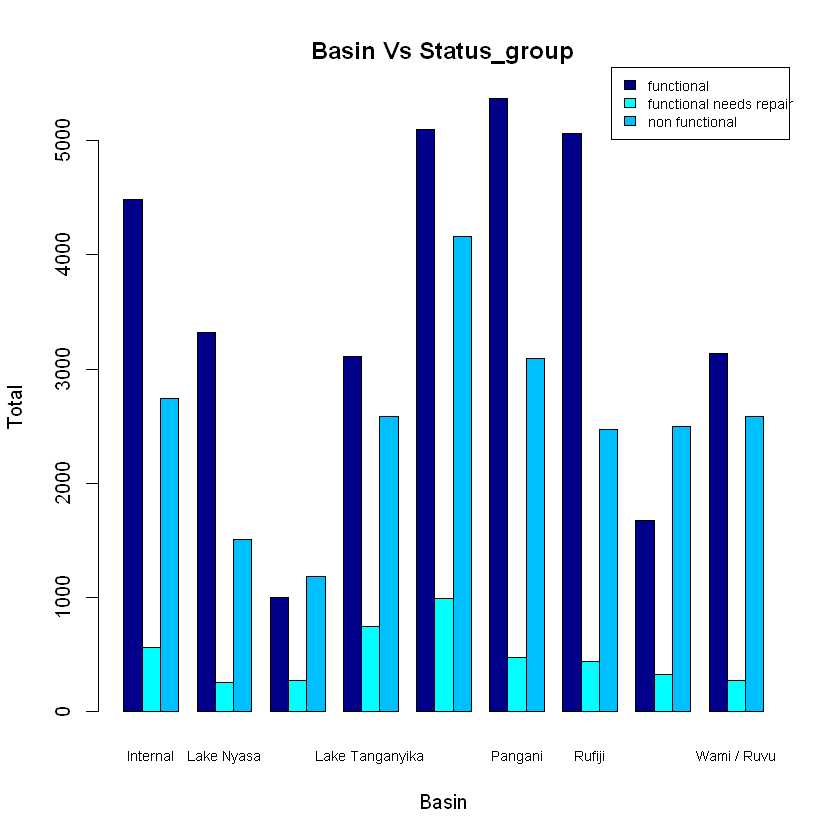

In [8]:
# Grouped Bar Plot
counts <- table(train_label_val$status_group, train_label_val$basin)
# par(xpd=TRUE)
barplot(counts, main="Basin Vs Status_group",
      xlab="Basin",ylab="Total", col=c("darkblue","cyan1","deepskyblue"),
      legend.text = rownames(counts),
      args.legend = list(x = "topright",cex = 0.7, ncol = 1,inset = c(- 0.0, -0.05)),
      beside=TRUE,cex.names=0.7 )
options(repr.plot.width=15, repr.plot.height=8)

#         args.legend = list(x = "bottom", text.width = c(25, 30, 0, 17),
#                        bty='n', horiz = T, inset=-0.2, cex = .8),
#        args.legend = list( x = "topright",inset = c(- 0.15, 0)),
#         args.legend = list(x = "topleft", bty="n", cex = 0.7, ncol = 2),

# legend("topright", 
#        legend = rownames(counts), 
#        ncol = 2,
#        cex = 0.5)
# barplot(dfN, beside=T, legend.text = rownames(dfN),
#         args.legend = list(x = "topleft", bty="n", cex = 0.7, ncol = 2))



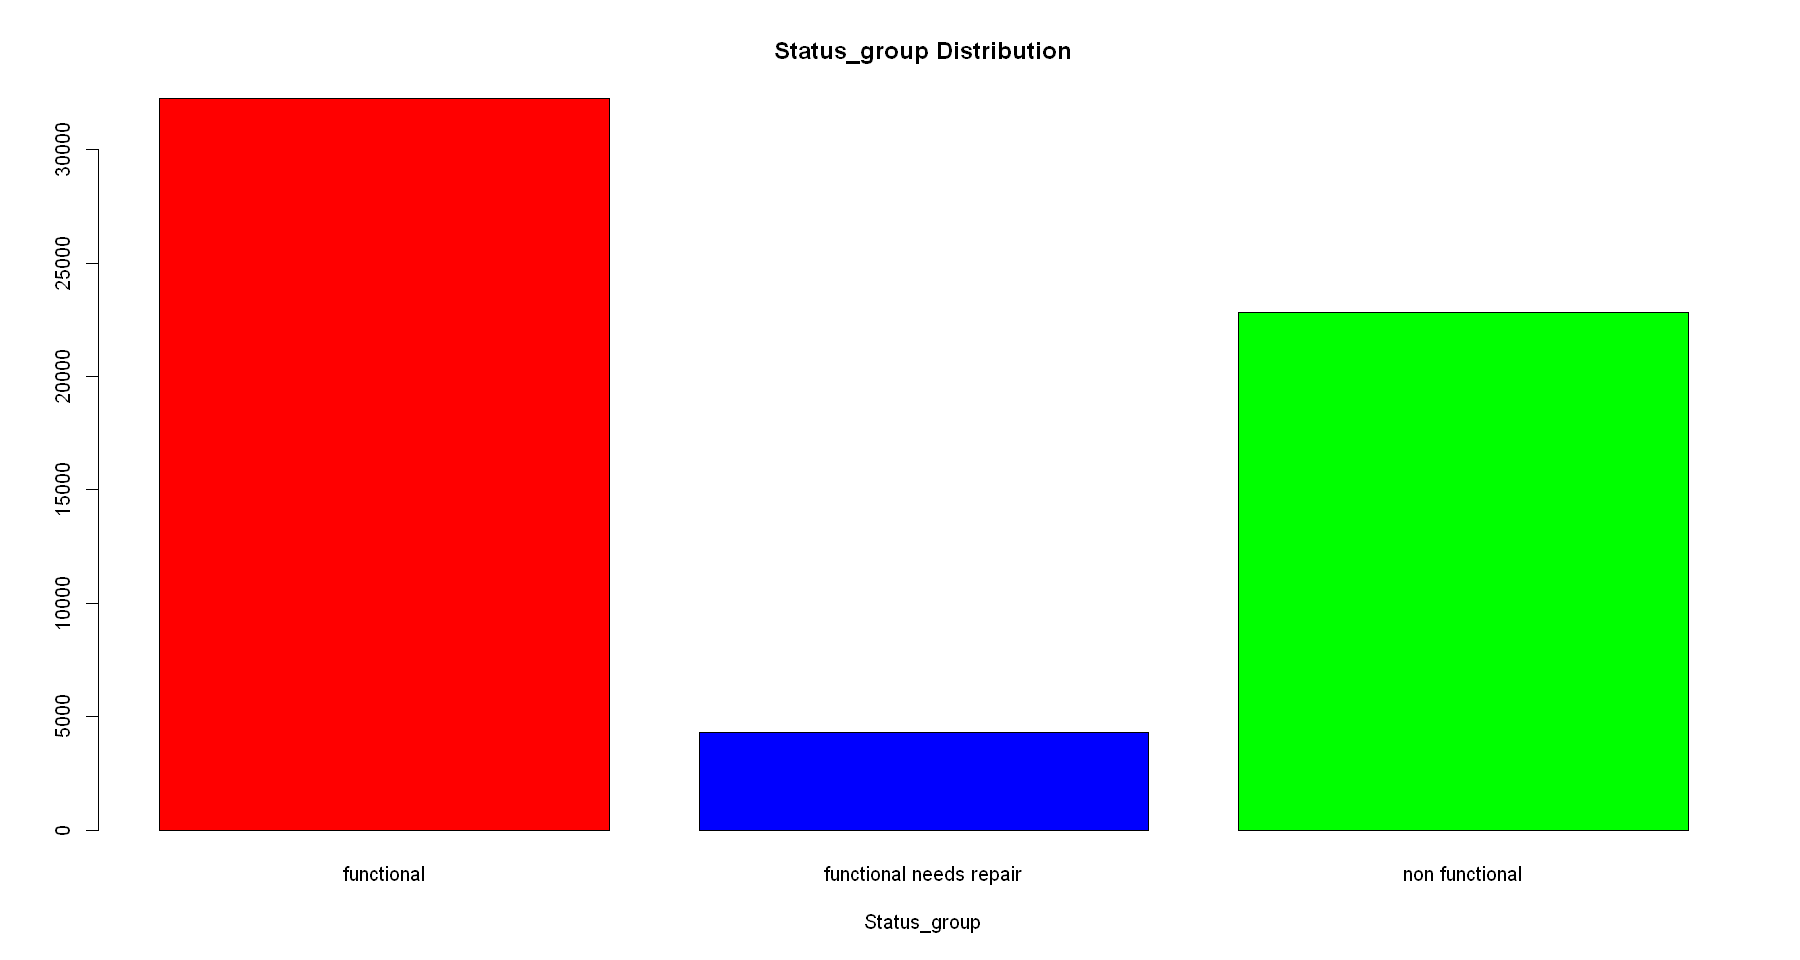

In [9]:
# Distribution of Status_group

counts <- table(train_label_val$status_group)
barplot(counts, main="Status_group Distribution",
   xlab="Status_group",col=c("red","blue","green"))

In [8]:
prop.table(table(train_label_val$status_group))


             functional functional needs repair          non functional 
             0.54308081              0.07267677              0.38424242 

In [ ]:
# gc()
# # mem_used()
# train_label_val1<-kNN(train_label_val,variable = c("scheme_name","scheme_management","installer",
#                                                   "funder","public_meeting","permit","subvillage"),
#                      k=100)

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2851618,152.3,5349238,285.7,5258267,280.9
Vcells,9297842,71.0,20196411,154.1,16753729,127.9


In [16]:
# handling missing value in scheme_name
train_label_val$scheme_name[is.na(train_label_val$scheme_name)]<-"other scheme"
train_label_val$scheme_management[is.na(train_label_val$scheme_management)]<-"unknown management"
train_label_val$installer[is.na(train_label_val$installer)]<-"unknown installer"
train_label_val$funder[is.na (train_label_val$funder)]<-"unknown funder"
train_label_val$public_meeting[is.na (train_label_val$public_meeting)]<-"TRUE"
train_label_val$permit[is.na (train_label_val$permit)]<-"TRUE"
train_label_val$subvillage[is.na (train_label_val$subvillage)]<-"other subvillage"

In [17]:
miss_var_summary(train_label_val)
options(repr.matrix.max.cols=150, repr.matrix.max.rows=50)

variable,n_miss,pct_miss
<chr>,<int>,<dbl>
id,0,0
amount_tsh,0,0
date_recorded,0,0
funder,0,0
gps_height,0,0
installer,0,0
longitude,0,0
latitude,0,0
wpt_name,0,0


In [15]:
# LABEL ENCODING
# label <- LabelEncoder$new()
#  train_label_val$funder <- label$fit_transform(train_label_val$funder)

In [14]:
# drop recorderBy column
# drop_recordedBy<-train_label_val[,-20]
# train_label_val

In [ ]:
# #one hot encoding
# dummy <- dummyVars(" ~ .", data=drop_recordedBy,fullRank = T)
# dummytrain <- data.frame(predict(dummy, newdata = drop_recordedBy)) 

In [18]:
# Data Partition
set.seed(123)
ind <- sample(2, nrow(train_label_val), replace = TRUE, prob = c(0.7, 0.3))
train <- train_label_val[ind==1,]
test <- train_label_val[ind==2,]

table(train$status_group)
prop.table(table(train$status_group))
# summary(train)


             functional functional needs repair          non functional 
                  22574                    3003                   16137 


             functional functional needs repair          non functional 
             0.54116124              0.07199022              0.38684854 

In [19]:
length(which(train$status_group=="functional"))
length(which(train$status_group=="functional needs repair"))
length(which(train$status_group=="non functional"))
22574/(3003+16137)

[1] 22574

[1] 3003

[1] 16137

[1] 1.179415

In [20]:
table(train$status_group)
prop.table(table(train$status_group))


             functional functional needs repair          non functional 
                  22574                    3003                   16137 


             functional functional needs repair          non functional 
             0.54116124              0.07199022              0.38684854 

In [ ]:
# summary(train)

In [21]:
#predictive model
train$status_group=factor(train$status_group)
test$status_group=factor(test$status_group)
rftrain<-randomForest(status_group ~ . ,data = train,
                      importance=TRUE)


In [42]:
rftrain
# rf.train<-data.frame(rftrain)
# write.csv(rf.train,"dataset/rftrain.csv",row.names=FALSE)


Call:
 randomForest(formula = status_group ~ ., data = train, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 6

        OOB estimate of  error rate: 18.98%
Confusion matrix:
                        functional functional needs repair non functional
functional                   20419                     433           1722
functional needs repair       1623                     957            423
non functional                3500                     218          12419
                        class.error
functional               0.09546381
functional needs repair  0.68131868
non functional           0.23040218

In [26]:
# write.csv(rftrain,'rftrain.csv')

In [22]:
#predictive model with test data
confusionMatrix(predict(rftrain,test),test$status_group,positive = "functional")
colnames(train)

Confusion Matrix and Statistics

                         Reference
Prediction                functional functional needs repair non functional
  functional                    8974                     856           1714
  functional needs repair         92                     292             46
  non functional                 619                     166           4927

Overall Statistics
                                          
               Accuracy : 0.8025          
                 95% CI : (0.7966, 0.8083)
    No Information Rate : 0.5476          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6192          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: functional Class: functional needs repair
Sensitivity                     0.9266                        0.22222
Specificity                     0.6788                    

[1] "id"                    "amount_tsh"            "date_recorded"        
 [4] "funder"                "gps_height"            "installer"            
 [7] "longitude"             "latitude"              "wpt_name"             
[10] "num_private"           "basin"                 "subvillage"           
[13] "region"                "region_code"           "district_code"        
[16] "lga"                   "ward"                  "population"           
[19] "public_meeting"        "recorded_by"           "scheme_management"    
[22] "scheme_name"           "permit"                "construction_year"    
[25] "extraction_type"       "extraction_type_group" "extraction_type_class"
[28] "management"            "management_group"      "payment"              
[31] "payment_type"          "water_quality"         "quality_group"        
[34] "quantity"              "quantity_group"        "source"               
[37] "source_type"           "source_class"          "waterpoint_type"      
[40] "waterpoint_type_group" "status_group"

In [41]:
nrow(train)

[1] 41714

In [47]:
test_val<-read.csv("dataset/test values.csv",na.strings=c("","NA"))

test_val$scheme_name[is.na(test_val$scheme_name)]<-"other scheme"
test_val$scheme_management[is.na(test_val$scheme_management)]<-"unknown management"
test_val$installer[is.na(test_val$installer)]<-"unknown installer"
test_val$funder[is.na (test_val$funder)]<-"unknown funder"
test_val$public_meeting[is.na (test_val$public_meeting)]<-"TRUE"
test_val$permit[is.na (test_val$permit)]<-"TRUE"
test_val$subvillage[is.na (test_val$subvillage)]<-"other subvillage"


# miss_var_summary(test_val)
p <- predict(rftrain, test_val)
# train_val<-read.csv("dataset/training values.csv",na.strings=c("","NA"))


In [50]:
p


1                       2                       3 
         non functional              functional              functional 
                      4                       5                       6 
         non functional              functional              functional 
                      7                       8                       9 
             functional          non functional          non functional 
                     10                      11                      12 
             functional              functional          non functional 
                     13                      14                      15 
         non functional          non functional              functional 
                     16                      17                      18 
             functional              functional              functional 
                     19                      20                      21 
             functional          non functional              functional 
                     22                      23                      24 
             functional          non functional          non functional 
                     25                      26                      27 
             functional              functional          non functional 
                     28                      29                      30 
         non functional functional needs repair              functional 
                     31                      32                      33 
             functional          non functional          non functional 
                     34                      35                      36 
             functional              functional              functional 
                     37                      38                      39 
             functional              functional          non functional 
                     40                      41                      42 
         non functional              functional              functional 
                     43                      44                      45 
         non functional          non functional              functional 
                     46                      47                      48 
         non functional              functional              functional 
                     49                      50                      51 
             functional              functional              functional 
                     52                      53                      54 
             functional              functional          non functional 
                     55                      56                      57 
         non functional          non functional              functional 
                     58                      59                      60 
         non functional              functional          non functional 
                     61                      62                      63 
             functional              functional              functional 
                     64                      65                      66 
         non functional              functional              functional 
                     67                      68                      69 
             functional          non functional              functional 
                     70                      71                      72 
         non functional          non functional functional needs repair 
                     73                      74                      75 
             functional          non functional          non functional 
                     76                      77                      78 
             functional              functional              functional 
                     79                      80                      81 
             functional          non functional              functional 
                     82                      83                      84 
       

 Factor w/ 3 levels "functional","functional needs repair",..: 3 1 1 3 1 1 1 3 3 1 ...
 - attr(*, "names")= chr [1:14850] "1" "2" "3" "4" ...


In [63]:
test_id<-test_val$id

# test_id

In [60]:
p.df<-data.frame(p)


In [64]:
test_merge<-cbind(test_id,p.df)
# [11:47 AM] BOUCHER  Nicolas
    
# test_merge = cbind(test_id, p.df)

test_merge

,test_id,p
,<int>,<fct>
1,50785,non functional
2,51630,functional
3,17168,functional
4,45559,non functional
5,49871,functional
6,52449,functional
7,24806,functional
8,28965,non functional
9,36301,non functional


In [65]:
write.csv(test_merge,"dataset/test_merge.csv",row.names=FALSE)

In [27]:
# over <- ovun.sample(status_group~., data = train, method = "over", N = 2000)$data
# table(train$status_group)
# summary(over)

# newTrain <- RandOverClassif(status_group~., train)
# newModel <- rpart(status_group~., newTrain)
# newPreds <- predict(newModel, test, type = "class")
# table(newPreds, test$status_group)
set.seed(234)
train$status_group=factor(train$status_group)
test$status_group=factor(test$status_group)
dtrain<-downSample(x=train[,-ncol(train)],
                  y=train$status_group,
                   yname='status_group'
                  )
# table(dtrain$status_group)

In [28]:
colnames(dtrain)

[1] "id"                    "amount_tsh"            "date_recorded"        
 [4] "funder"                "gps_height"            "installer"            
 [7] "longitude"             "latitude"              "wpt_name"             
[10] "num_private"           "basin"                 "subvillage"           
[13] "region"                "region_code"           "district_code"        
[16] "lga"                   "ward"                  "population"           
[19] "public_meeting"        "recorded_by"           "scheme_management"    
[22] "scheme_name"           "permit"                "construction_year"    
[25] "extraction_type"       "extraction_type_group" "extraction_type_class"
[28] "management"            "management_group"      "payment"              
[31] "payment_type"          "water_quality"         "quality_group"        
[34] "quantity"              "quantity_group"        "source"               
[37] "source_type"           "source_class"          "waterpoint_type"      
[40] "waterpoint_type_group" "status_group"

In [29]:
# length(which(dtrain$status_group=="functional"))
# length(which(dtrain$status_group=="functional needs repair"))
# length(which(dtrain$status_group=="non functional"))
table(dtrain$status_group)


             functional functional needs repair          non functional 
                   3003                    3003                    3003 

In [30]:
nrow(dtrain)
rfunder<-randomForest(status_group ~ . ,data = dtrain,
                      importance=TRUE)
# confusionMatrix(predict(rfunder,test),test$status_group,positive = "functional")


[1] 9009

In [31]:
confusionMatrix(predict(rfunder,test),test$status_group,positive = "functional")

Confusion Matrix and Statistics

                         Reference
Prediction                functional functional needs repair non functional
  functional                    6534                     267           1148
  functional needs repair       1856                     921            793
  non functional                1295                     126           4746

Overall Statistics
                                         
               Accuracy : 0.6899         
                 95% CI : (0.683, 0.6967)
    No Information Rate : 0.5476         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.4891         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      

Statistics by Class:

                     Class: functional Class: functional needs repair
Sensitivity                     0.6747                        0.70091
Specificity                     0.8231                        0.838

In [ ]:
counts <- table(dtrain$status_group)
barplot(counts, main="Status_group Distribution",
   xlab="Status_group",col=c("red","blue","green"))

In [34]:
#over sampling
set.seed(234)
train$status_group=factor(train$status_group)
test$status_group=factor(test$status_group)
utrain<-upSample(x=train[,-ncol(train)],
                  y=train$status_group,
                   yname='status_group'
                  )

In [35]:
table(utrain$status_group)


             functional functional needs repair          non functional 
                  22574                   22574                   22574 

In [36]:
nrow(dtrain)
rfover<-randomForest(status_group ~ . ,data = utrain,
                      importance=TRUE)

[1] 67722

In [37]:
confusionMatrix(predict(rfover,test),test$status_group,positive = "functional")

Confusion Matrix and Statistics

                         Reference
Prediction                functional functional needs repair non functional
  functional                    8723                     703           1608
  functional needs repair        270                     459            111
  non functional                 692                     152           4968

Overall Statistics
                                          
               Accuracy : 0.8001          
                 95% CI : (0.7941, 0.8059)
    No Information Rate : 0.5476          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6232          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: functional Class: functional needs repair
Sensitivity                     0.9007                        0.34932
Specificity                     0.7112                    

# Model selection

## Model 1

## Model 2

## Model 3

#### Example of simple equation
\begin{equation}
e = mc^2
\end{equation}

#### Example of matrix equation - Cross product formula:

\begin{equation*}
\mathbf{V}_1 \times \mathbf{V}_2 =  \begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
\frac{\partial X}{\partial u} &  \frac{\partial Y}{\partial u} & 0 \\
\frac{\partial X}{\partial v} &  \frac{\partial Y}{\partial v} & 0
\end{vmatrix}
\end{equation*}

#### Example of multiline equation - The Lorenz Equations:

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

#### Example of Markdown Table:

| This | is   |
|------|------|
|   a  | table|


# Alternative models





# Conclusions